# 1. Load data

**The author use Colab**

In [73]:
''' optional: only work in Google Colab '''
#from google.colab import drive
#drive.mount('/content/drive')

' optional: only work in Google Colab '

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/HSUHK2024/COM6005/Project/data/'   #as what we learnt from COM6001 (modify the path to fit with yours)
df = pd.read_excel(path+'Residential-Building-Data-Set.xlsx',   #1: specify your excel
                     sheet_name='Data',                         #2: specify your sheet
                     skiprows=1,                                #3: one row is affecting the creation of dataframe, so it is skipped
                     header=0                                   #4: then, we have a header at the beginning
                     )
df

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.00,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.00,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.00,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.00,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.00,1734973.5,5500,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,83,4,86,1,20,1350.0,350.0,108.0,80,251.37,...,1176.50,8343.60,8382.0,87.27,85.56,10555.47,33626.25,865878.9,1100,150
368,81,2,82,4,20,600.0,150.0,36.0,60,299.55,...,815.50,1755.00,8013.0,62.78,56.45,3387.72,10646.75,606524.2,740,80
369,84,4,86,3,20,1900.0,430.0,285.0,150,364.41,...,1584.30,8776.71,8799.0,101.00,101.89,13571.80,34474.50,1067772.0,860,220
370,82,3,84,4,20,510.0,160.0,30.6,60,245.28,...,909.20,7930.66,8004.0,73.57,69.26,4756.68,21855.00,669640.3,1100,110


## Check Missing Data

In [75]:
df.isna().sum()

,0
START YEAR,0
START QUARTER,0
COMPLETION YEAR,0
COMPLETION QUARTER,0
V-1,0
...,...
V-27.4,0
V-28.4,0
V-29.4,0
V-9,0


In [76]:
df.isna().sum().sum()

0

**Findings: No missing data**

## Tidy Up the DataFrame

**Operations are: Fixing year in AD, Renaming Column Header, Moving *Y* in front of *X* for Easy Reading**

In [77]:
df.columns = df.columns.str.replace('V-9','Actual Sales Price') #give Output 1 a proper name
df.columns = df.columns.str.replace('V-10','Actual Construction Cost') #give Output 2 a proper name
df.columns

Index(['START YEAR', 'START QUARTER', 'COMPLETION YEAR', 'COMPLETION QUARTER',
       'V-1', 'V-2', 'V-3', 'V-4', 'V-5', 'V-6',
       ...
       'V-22.4', 'V-23.4', 'V-24.4', 'V-25.4', 'V-26.4', 'V-27.4', 'V-28.4',
       'V-29.4', 'Actual Sales Price', 'Actual Construction Cost'],
      dtype='object', length=109)

In [78]:
'''fix Persian Calendar to Gregorian Calendar (AD)'''
df['START YEAR'] = df['START YEAR'] + 1921 # make year to be western AD year
df.columns = df.columns.str.replace('START YEAR','START YEAR AD') # and rename column for clarity
df['COMPLETION YEAR'] = df['COMPLETION YEAR'] + 1921
df.columns = df.columns.str.replace('COMPLETION YEAR','COMPLETION YEAR AD')
df

,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,Actual Sales Price,Actual Construction Cost
0,2002,1,2006,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.00,601988.1,2200,410
1,2005,1,2010,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.00,929027.1,5000,1000
2,1999,1,2002,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.00,377828.6,1200,170
3,1993,2,1994,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.00,122031.7,165,30
4,2008,1,2011,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.00,1734973.5,5500,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2004,4,2007,1,20,1350.0,350.0,108.0,80,251.37,...,1176.50,8343.60,8382.0,87.27,85.56,10555.47,33626.25,865878.9,1100,150
368,2002,2,2003,4,20,600.0,150.0,36.0,60,299.55,...,815.50,1755.00,8013.0,62.78,56.45,3387.72,10646.75,606524.2,740,80
369,2005,4,2007,3,20,1900.0,430.0,285.0,150,364.41,...,1584.30,8776.71,8799.0,101.00,101.89,13571.80,34474.50,1067772.0,860,220
370,2003,3,2005,4,20,510.0,160.0,30.6,60,245.28,...,909.20,7930.66,8004.0,73.57,69.26,4756.68,21855.00,669640.3,1100,110


In [79]:
# rearrange columns: make Outputs come to front for easier reading
df = pd.concat([df.iloc[:,-2],
                df.iloc[:,-1],
                df.iloc[:,0:-2]
                ],
               axis=1)
df

,Actual Sales Price,Actual Construction Cost,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-20.4,V-21.4,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4
0,2200,410,2002,1,2006,1,1,3150.0,920.0,598.5,...,15,733.800000,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.00,601988.1
1,5000,1000,2005,1,2010,4,1,7600.0,1140.0,3040.0,...,15,1143.800000,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.00,929027.1
2,1200,170,1999,1,2002,4,1,4800.0,840.0,480.0,...,15,589.500000,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.00,377828.6
3,165,30,1993,2,1994,2,1,685.0,202.0,13.7,...,12,197.679557,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.00,122031.7
4,5500,700,2008,1,2011,2,1,3000.0,800.0,1230.0,...,14,2220.600000,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.00,1734973.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1100,150,2004,4,2007,1,20,1350.0,350.0,108.0,...,15,1082.500000,1176.50,8343.60,8382.0,87.27,85.56,10555.47,33626.25,865878.9
368,740,80,2002,2,2003,4,20,600.0,150.0,36.0,...,15,746.800000,815.50,1755.00,8013.0,62.78,56.45,3387.72,10646.75,606524.2
369,860,220,2005,4,2007,3,20,1900.0,430.0,285.0,...,15,1424.100000,1584.30,8776.71,8799.0,101.00,101.89,13571.80,34474.50,1067772.0
370,1100,110,2003,3,2005,4,20,510.0,160.0,30.6,...,14,886.400000,909.20,7930.66,8004.0,73.57,69.26,4756.68,21855.00,669640.3


# 2. More Check on Data

## Check lag data consistency in columns

In [80]:
df['START YEAR AND QUARTER'] = df['START YEAR AD'].astype('string') + 'Q' + df['START QUARTER'].astype('string')
df['START YEAR AND QUARTER'] #we have a new column

,START YEAR AND QUARTER
0,2002Q1
1,2005Q1
2,1999Q1
3,1993Q2
4,2008Q1
...,...
367,2004Q4
368,2002Q2
369,2005Q4
370,2003Q3


In [81]:
df['START YEAR AND QUARTER'].value_counts().sort_index() #check the "time span" and "no. of quarters" (i.e. no. of time resolutions)

,count
START YEAR AND QUARTER,
1993Q2,4
1993Q3,1
1993Q4,1
1994Q1,2
1994Q2,3
...,...
2008Q4,3
2009Q1,3
2009Q2,1


**Finding 1: Time span: 1993Q2 to 2009Q4; No. of quarters: 67. Thus, conclude NO MISSING QUARTERS in between**<br>
**(Explanation: 1993 to 2004 have (2004-1992)*4 = 68 quarters, leave 1993Q1 not to count we have 67, align with the result from last command)**

## Check lag-data consistency across lags

In [82]:
df[['START YEAR AND QUARTER',
    'V-11','V-12','V-13','V-14','V-15','V-16','V-17','V-18','V-19','V-20',
    'V-21','V-22','V-23','V-24','V-25','V-26','V-27','V-28','V-29']].value_counts().sort_index()  #If we see 67 unique rows, the lag-1 data is consistent
                                                                                                  #note: value_counts() outputs a Series,
                                                                                                  #      and it do sorting by sort_index()

,,,,,,,,,,,,,,,,,,,,count
START YEAR AND QUARTER,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,
1993Q2,2580.93,12.1,10.03,1.24,38193.64,287.2,13.60,17.03,154.40,12,183.60,211.10,1612.95,1649.0,11.62,10.06,392.96,8435.75,141542.6,4
1993Q3,2611.13,12.7,11.56,1.50,41015.52,373.9,14.54,34.05,308.80,12,192.60,232.90,1591.75,1601.0,11.91,10.41,363.13,16871.50,146872.1,1
1993Q4,2641.34,13.1,13.09,1.11,43837.40,339.6,15.48,51.08,463.20,12,170.30,217.20,1657.66,1759.0,12.61,11.03,354.55,25307.25,155181.7,1
1994Q1,2671.55,13.6,14.63,1.39,48135.00,427.3,16.42,68.10,617.60,12,207.60,255.40,1750.00,2224.0,13.77,11.66,403.50,33743.00,217000.1,2
1994Q2,1818.00,14.3,16.16,1.34,47344.80,356.0,17.36,26.83,247.33,15,184.70,211.90,1750.00,2602.0,14.98,12.01,408.84,8684.50,262159.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q4,3098.00,255.8,216.48,3.80,1704943.80,18468.3,292.40,250.58,49414.13,11,3447.80,3676.10,9967.33,10099.3,190.50,204.80,8857.00,38196.00,2310101.4,3
2009Q1,3131.00,259.5,204.02,3.44,1901366.00,16139.0,276.10,334.10,65885.50,11,3499.40,3823.60,9784.77,9867.6,191.63,212.10,7966.50,50928.00,2217708.7,3
2009Q2,2576.00,261.5,186.80,3.50,1970485.10,14711.0,294.47,69.12,13188.64,11,3746.01,4215.95,9833.67,9908.0,196.76,215.00,9258.40,12910.71,2183435.0,1


In [83]:
print(df[['START YEAR AND QUARTER',
          'V-11.1','V-12.1','V-13.1','V-14.1','V-15.1','V-16.1','V-17.1','V-18.1','V-19.1','V-20.1',
          'V-21.1','V-22.1','V-23.1','V-24.1','V-25.1','V-26.1','V-27.1','V-28.1','V-29.1']].value_counts().sort_index().shape[0]) #check lag-2 data
print(df[['START YEAR AND QUARTER',
          'V-11.2','V-12.2','V-13.2','V-14.2','V-15.2','V-16.2','V-17.2','V-18.2','V-19.2','V-20.2',
          'V-21.2','V-22.2','V-23.2','V-24.2','V-25.2','V-26.2','V-27.2','V-28.2','V-29.2']].value_counts().sort_index().shape[0]) #check lag-3 data
print(df[['START YEAR AND QUARTER',
          'V-11.3','V-12.3','V-13.3','V-14.3','V-15.3','V-16.3','V-17.3','V-18.3','V-19.3','V-20.3',
          'V-21.3','V-22.3','V-23.3','V-24.3','V-25.3','V-26.3','V-27.3','V-28.3','V-29.3']].value_counts().sort_index().shape[0]) #check lag-4 data
print(df[['START YEAR AND QUARTER',
          'V-11.4','V-12.4','V-13.4','V-14.4','V-15.4','V-16.4','V-17.4','V-18.4','V-19.4','V-20.4',
          'V-21.4','V-22.4','V-23.4','V-24.4','V-25.4','V-26.4','V-27.4','V-28.4','V-29.4']].value_counts().sort_index().shape[0]) #check lag-5 data

67
67
67
67


In [84]:
#we need dataframes to do further checking
df[['START YEAR AND QUARTER',
    'V-11','V-12','V-13','V-14','V-15','V-16','V-17','V-18','V-19','V-20',
    'V-21','V-22','V-23','V-24','V-25','V-26','V-27','V-28','V-29']].drop_duplicates() \
                                                                    .sort_values(by=['START YEAR AND QUARTER'],ignore_index=True)

,START YEAR AND QUARTER,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29
0,1993Q2,2580.93,12.1,10.03,1.24,38193.64,287.2,13.60,17.03,154.40,12,183.60,211.10,1612.95,1649.0,11.62,10.06,392.96,8435.75,141542.6
1,1993Q3,2611.13,12.7,11.56,1.50,41015.52,373.9,14.54,34.05,308.80,12,192.60,232.90,1591.75,1601.0,11.91,10.41,363.13,16871.50,146872.1
2,1993Q4,2641.34,13.1,13.09,1.11,43837.40,339.6,15.48,51.08,463.20,12,170.30,217.20,1657.66,1759.0,12.61,11.03,354.55,25307.25,155181.7
3,1994Q1,2671.55,13.6,14.63,1.39,48135.00,427.3,16.42,68.10,617.60,12,207.60,255.40,1750.00,2224.0,13.77,11.66,403.50,33743.00,217000.1
4,1994Q2,1818.00,14.3,16.16,1.34,47344.80,356.0,17.36,26.83,247.33,15,184.70,211.90,1750.00,2602.0,14.98,12.01,408.84,8684.50,262159.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2008Q4,3098.00,255.8,216.48,3.80,1704943.80,18468.3,292.40,250.58,49414.13,11,3447.80,3676.10,9967.33,10099.3,190.50,204.80,8857.00,38196.00,2310101.4
63,2009Q1,3131.00,259.5,204.02,3.44,1901366.00,16139.0,276.10,334.10,65885.50,11,3499.40,3823.60,9784.77,9867.6,191.63,212.10,7966.50,50928.00,2217708.7
64,2009Q2,2576.00,261.5,186.80,3.50,1970485.10,14711.0,294.47,69.12,13188.64,11,3746.01,4215.95,9833.67,9908.0,196.76,215.00,9258.40,12910.71,2183435.0
65,2009Q3,2265.00,267.8,192.10,2.40,2116613.80,16335.0,306.93,138.24,26377.29,11,3962.24,4472.30,9925.49,9988.0,201.66,218.40,11479.80,25821.42,2271543.7


In [85]:
#repeat last step to create 5 lag-data dataframes
lag1_df = df[['START YEAR AND QUARTER',
              'V-11','V-12','V-13','V-14','V-15','V-16','V-17','V-18','V-19','V-20',
              'V-21','V-22','V-23','V-24','V-25','V-26','V-27','V-28','V-29']].drop_duplicates() \
                                                                              .sort_values(by=['START YEAR AND QUARTER'],ignore_index=True)
lag2_df = df[['START YEAR AND QUARTER',
              'V-11.1','V-12.1','V-13.1','V-14.1','V-15.1','V-16.1','V-17.1','V-18.1','V-19.1','V-20.1',
              'V-21.1','V-22.1','V-23.1','V-24.1','V-25.1','V-26.1','V-27.1','V-28.1','V-29.1']].drop_duplicates() \
                                                                              .sort_values(by=['START YEAR AND QUARTER'],ignore_index=True)
lag3_df = df[['START YEAR AND QUARTER',
              'V-11.2','V-12.2','V-13.2','V-14.2','V-15.2','V-16.2','V-17.2','V-18.2','V-19.2','V-20.2',
              'V-21.2','V-22.2','V-23.2','V-24.2','V-25.2','V-26.2','V-27.2','V-28.2','V-29.2']].drop_duplicates() \
                                                                              .sort_values(by=['START YEAR AND QUARTER'],ignore_index=True)
lag4_df = df[['START YEAR AND QUARTER',
              'V-11.3','V-12.3','V-13.3','V-14.3','V-15.3','V-16.3','V-17.3','V-18.3','V-19.3','V-20.3',
              'V-21.3','V-22.3','V-23.3','V-24.3','V-25.3','V-26.3','V-27.3','V-28.3','V-29.3']].drop_duplicates() \
                                                                              .sort_values(by=['START YEAR AND QUARTER'],ignore_index=True)
lag5_df = df[['START YEAR AND QUARTER',
              'V-11.4','V-12.4','V-13.4','V-14.4','V-15.4','V-16.4','V-17.4','V-18.4','V-19.4','V-20.4',
              'V-21.4','V-22.4','V-23.4','V-24.4','V-25.4','V-26.4','V-27.4','V-28.4','V-29.4']].drop_duplicates() \
                                                                              .sort_values(by=['START YEAR AND QUARTER'],ignore_index=True)

In [86]:
#compare V11 first
pd.concat([lag1_df.iloc[:-4,0:2],
           lag2_df.iloc[1:-3,0:2],
           lag3_df.iloc[2:-2,0:2],
           lag4_df.iloc[3:-1,0:2],
           lag5_df.iloc[4:,0:2]], axis=1)

,START YEAR AND QUARTER,V-11,START YEAR AND QUARTER,V-11.1,START YEAR AND QUARTER,V-11.2,START YEAR AND QUARTER,V-11.3,START YEAR AND QUARTER,V-11.4
0,1993Q2,2580.93,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN
1,1993Q3,2611.13,1993Q3,2580.93,<NA>,NaN,<NA>,NaN,<NA>,NaN
2,1993Q4,2641.34,1993Q4,2611.13,1993Q4,2580.93,<NA>,NaN,<NA>,NaN
3,1994Q1,2671.55,1994Q1,2641.34,1994Q1,2611.13,1994Q1,2580.93,<NA>,NaN
4,1994Q2,1818.00,1994Q2,2671.55,1994Q2,2641.34,1994Q2,2611.13,1994Q2,2580.93
...,...,...,...,...,...,...,...,...,...,...
62,2008Q4,3098.00,2008Q4,4242.00,2008Q4,6458.00,2008Q4,6790.00,2008Q4,6370.00
63,<NA>,NaN,2009Q1,3098.00,2009Q1,4242.00,2009Q1,6458.00,2009Q1,6790.00
64,<NA>,NaN,<NA>,NaN,2009Q2,3098.00,2009Q2,4242.00,2009Q2,6458.00
65,<NA>,NaN,<NA>,NaN,<NA>,NaN,2009Q3,3098.00,2009Q3,4242.00


In [87]:
#we can use reset_index() to make V11.x across lag-data1,2,3,4,5 align
pd.concat([lag1_df.iloc[:-4,0:2].reset_index(),
           lag2_df.iloc[1:-3,0:2].reset_index(),
           lag3_df.iloc[2:-2,0:2].reset_index(),
           lag4_df.iloc[3:-1,0:2].reset_index(),
           lag5_df.iloc[4:,0:2].reset_index()],
           axis=1)

,index,START YEAR AND QUARTER,V-11,index,START YEAR AND QUARTER,V-11.1,index,START YEAR AND QUARTER,V-11.2,index,START YEAR AND QUARTER,V-11.3,index,START YEAR AND QUARTER,V-11.4
0,0,1993Q2,2580.93,1,1993Q3,2580.93,2,1993Q4,2580.93,3,1994Q1,2580.93,4,1994Q2,2580.93
1,1,1993Q3,2611.13,2,1993Q4,2611.13,3,1994Q1,2611.13,4,1994Q2,2611.13,5,1994Q3,2611.13
2,2,1993Q4,2641.34,3,1994Q1,2641.34,4,1994Q2,2641.34,5,1994Q3,2641.34,6,1994Q4,2641.34
3,3,1994Q1,2671.55,4,1994Q2,2671.55,5,1994Q3,2671.55,6,1994Q4,2671.55,7,1995Q1,2671.55
4,4,1994Q2,1818.00,5,1994Q3,1818.00,6,1994Q4,1818.00,7,1995Q1,1818.00,8,1995Q2,1818.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,2007Q4,6370.00,59,2008Q1,6370.00,60,2008Q2,6370.00,61,2008Q3,6370.00,62,2008Q4,6370.00
59,59,2008Q1,6790.00,60,2008Q2,6790.00,61,2008Q3,6790.00,62,2008Q4,6790.00,63,2009Q1,6790.00
60,60,2008Q2,6458.00,61,2008Q3,6458.00,62,2008Q4,6458.00,63,2009Q1,6458.00,64,2009Q2,6458.00
61,61,2008Q3,4242.00,62,2008Q4,4242.00,63,2009Q1,4242.00,64,2009Q2,4242.00,65,2009Q3,4242.00


In [88]:
#make all lag-data dataframe has the same column-index, such that we can COMPARE V11 to V29 in one go
lag1_df.columns = lag1_df.columns.str[0:]+'.x';
lag1_df.columns = lag1_df.columns.str.replace('START YEAR AND QUARTER.x','START YEAR AND QUARTER')
lag2_df.columns = lag2_df.columns.str.replace('.1','.x')
lag3_df.columns = lag3_df.columns.str.replace('.2','.x')
lag4_df.columns = lag4_df.columns.str.replace('.3','.x')
lag5_df.columns = lag5_df.columns.str.replace('.4','.x')
print(lag1_df.columns)
print(lag2_df.columns)
print(lag3_df.columns)
print(lag4_df.columns)
print(lag5_df.columns)

Index(['START YEAR AND QUARTER', 'V-11.x', 'V-12.x', 'V-13.x', 'V-14.x',
       'V-15.x', 'V-16.x', 'V-17.x', 'V-18.x', 'V-19.x', 'V-20.x', 'V-21.x',
       'V-22.x', 'V-23.x', 'V-24.x', 'V-25.x', 'V-26.x', 'V-27.x', 'V-28.x',
       'V-29.x'],
      dtype='object')
Index(['START YEAR AND QUARTER', 'V-11.x', 'V-12.x', 'V-13.x', 'V-14.x',
       'V-15.x', 'V-16.x', 'V-17.x', 'V-18.x', 'V-19.x', 'V-20.x', 'V-21.x',
       'V-22.x', 'V-23.x', 'V-24.x', 'V-25.x', 'V-26.x', 'V-27.x', 'V-28.x',
       'V-29.x'],
      dtype='object')
Index(['START YEAR AND QUARTER', 'V-11.x', 'V-12.x', 'V-13.x', 'V-14.x',
       'V-15.x', 'V-16.x', 'V-17.x', 'V-18.x', 'V-19.x', 'V-20.x', 'V-21.x',
       'V-22.x', 'V-23.x', 'V-24.x', 'V-25.x', 'V-26.x', 'V-27.x', 'V-28.x',
       'V-29.x'],
      dtype='object')
Index(['START YEAR AND QUARTER', 'V-11.x', 'V-12.x', 'V-13.x', 'V-14.x',
       'V-15.x', 'V-16.x', 'V-17.x', 'V-18.x', 'V-19.x', 'V-20.x', 'V-21.x',
       'V-22.x', 'V-23.x', 'V-24.x', 'V-25.x', 'V

In [89]:
lag1_df.iloc[:-4,0:2].reset_index()

,index,START YEAR AND QUARTER,V-11.x
0,0,1993Q2,2580.93
1,1,1993Q3,2611.13
2,2,1993Q4,2641.34
3,3,1994Q1,2671.55
4,4,1994Q2,1818.00
...,...,...,...
58,58,2007Q4,6370.00
59,59,2008Q1,6790.00
60,60,2008Q2,6458.00
61,61,2008Q3,4242.00


In [90]:
#check V11-V29 align across lag1 and lag2
lag1_df.iloc[:-4,].reset_index().drop(columns=['index','START YEAR AND QUARTER']) == lag2_df.iloc[1:-3,].reset_index().drop(columns=['index','START YEAR AND QUARTER'])

,V-11.x,V-12.x,V-13.x,V-14.x,V-15.x,V-16.x,V-17.x,V-18.x,V-19.x,V-20.x,V-21.x,V-22.x,V-23.x,V-24.x,V-25.x,V-26.x,V-27.x,V-28.x,V-29.x
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
59,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
60,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
61,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [91]:
print((lag1_df.iloc[:-4,].reset_index().drop(columns=['index','START YEAR AND QUARTER']) == lag2_df.iloc[1:-3,].reset_index().drop(columns=['index','START YEAR AND QUARTER'])).sum().sum())
print((lag2_df.iloc[1:-3,].reset_index().drop(columns=['index','START YEAR AND QUARTER']) == lag3_df.iloc[2:-2,].reset_index().drop(columns=['index','START YEAR AND QUARTER'])).sum().sum())
print((lag3_df.iloc[2:-2,].reset_index().drop(columns=['index','START YEAR AND QUARTER']) == lag4_df.iloc[3:-1,].reset_index().drop(columns=['index','START YEAR AND QUARTER'])).sum().sum())
print((lag4_df.iloc[3:-1,].reset_index().drop(columns=['index','START YEAR AND QUARTER']) == lag5_df.iloc[4:,].reset_index().drop(columns=['index','START YEAR AND QUARTER'])).sum().sum())
print(f"Comparison dataframe has this no. of cells in total: {63*19}")

1197
1197
1197
1197
Comparison dataframe has this no. of cells in total: 1197


**Findings: Econ metrices of different lag-data align across different lags.Together with consistency in each columns (checked in last part), lag-data are ALL CONSISTENT**

## Construction of a **no-lag** economic time-series dataset

In [92]:
lag1_df.loc[0:65,] #intermediate result

,START YEAR AND QUARTER,V-11.x,V-12.x,V-13.x,V-14.x,V-15.x,V-16.x,V-17.x,V-18.x,V-19.x,V-20.x,V-21.x,V-22.x,V-23.x,V-24.x,V-25.x,V-26.x,V-27.x,V-28.x,V-29.x
0,1993Q2,2580.93,12.1,10.03,1.24,38193.64,287.2,13.60,17.03,154.40,12,183.60,211.10,1612.95,1649.0,11.62,10.06,392.96,8435.75,141542.6
1,1993Q3,2611.13,12.7,11.56,1.50,41015.52,373.9,14.54,34.05,308.80,12,192.60,232.90,1591.75,1601.0,11.91,10.41,363.13,16871.50,146872.1
2,1993Q4,2641.34,13.1,13.09,1.11,43837.40,339.6,15.48,51.08,463.20,12,170.30,217.20,1657.66,1759.0,12.61,11.03,354.55,25307.25,155181.7
3,1994Q1,2671.55,13.6,14.63,1.39,48135.00,427.3,16.42,68.10,617.60,12,207.60,255.40,1750.00,2224.0,13.77,11.66,403.50,33743.00,217000.1
4,1994Q2,1818.00,14.3,16.16,1.34,47344.80,356.0,17.36,26.83,247.33,15,184.70,211.90,1750.00,2602.0,14.98,12.01,408.84,8684.50,262159.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2008Q3,4242.00,245.1,225.00,6.54,1670609.20,18690.9,300.50,167.05,32942.75,11,3355.80,3686.30,9403.58,9489.1,179.96,189.50,11763.00,25464.00,2303248.1
62,2008Q4,3098.00,255.8,216.48,3.80,1704943.80,18468.3,292.40,250.58,49414.13,11,3447.80,3676.10,9967.33,10099.3,190.50,204.80,8857.00,38196.00,2310101.4
63,2009Q1,3131.00,259.5,204.02,3.44,1901366.00,16139.0,276.10,334.10,65885.50,11,3499.40,3823.60,9784.77,9867.6,191.63,212.10,7966.50,50928.00,2217708.7
64,2009Q2,2576.00,261.5,186.80,3.50,1970485.10,14711.0,294.47,69.12,13188.64,11,3746.01,4215.95,9833.67,9908.0,196.76,215.00,9258.40,12910.71,2183435.0


In [93]:
lag1_df.loc[1:,].reset_index().drop(columns=['index','START YEAR AND QUARTER']) #intermediate result

,V-11.x,V-12.x,V-13.x,V-14.x,V-15.x,V-16.x,V-17.x,V-18.x,V-19.x,V-20.x,V-21.x,V-22.x,V-23.x,V-24.x,V-25.x,V-26.x,V-27.x,V-28.x,V-29.x
0,2611.13,12.7,11.56,1.50,41015.52,373.9,14.54,34.05,308.80,12,192.60,232.90,1591.75,1601.0,11.91,10.41,363.13,16871.50,146872.1
1,2641.34,13.1,13.09,1.11,43837.40,339.6,15.48,51.08,463.20,12,170.30,217.20,1657.66,1759.0,12.61,11.03,354.55,25307.25,155181.7
2,2671.55,13.6,14.63,1.39,48135.00,427.3,16.42,68.10,617.60,12,207.60,255.40,1750.00,2224.0,13.77,11.66,403.50,33743.00,217000.1
3,1818.00,14.3,16.16,1.34,47344.80,356.0,17.36,26.83,247.33,15,184.70,211.90,1750.00,2602.0,14.98,12.01,408.84,8684.50,262159.4
4,2197.00,15.5,17.69,1.67,52148.60,417.7,18.30,53.65,494.65,15,202.80,260.40,1750.00,2455.0,15.85,12.54,450.34,17369.00,268843.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3098.00,255.8,216.48,3.80,1704943.80,18468.3,292.40,250.58,49414.13,11,3447.80,3676.10,9967.33,10099.3,190.50,204.80,8857.00,38196.00,2310101.4
62,3131.00,259.5,204.02,3.44,1901366.00,16139.0,276.10,334.10,65885.50,11,3499.40,3823.60,9784.77,9867.6,191.63,212.10,7966.50,50928.00,2217708.7
63,2576.00,261.5,186.80,3.50,1970485.10,14711.0,294.47,69.12,13188.64,11,3746.01,4215.95,9833.67,9908.0,196.76,215.00,9258.40,12910.71,2183435.0
64,2265.00,267.8,192.10,2.40,2116613.80,16335.0,306.93,138.24,26377.29,11,3962.24,4472.30,9925.49,9988.0,201.66,218.40,11479.80,25821.42,2271543.7


In [94]:
lag0_df = pd.concat([lag1_df.loc[0:65,'START YEAR AND QUARTER'],
                     lag1_df.loc[1:,].reset_index().drop(columns=['index','START YEAR AND QUARTER'])],
                    axis=1)
lag0_df

,START YEAR AND QUARTER,V-11.x,V-12.x,V-13.x,V-14.x,V-15.x,V-16.x,V-17.x,V-18.x,V-19.x,V-20.x,V-21.x,V-22.x,V-23.x,V-24.x,V-25.x,V-26.x,V-27.x,V-28.x,V-29.x
0,1993Q2,2611.13,12.7,11.56,1.50,41015.52,373.9,14.54,34.05,308.80,12,192.60,232.90,1591.75,1601.0,11.91,10.41,363.13,16871.50,146872.1
1,1993Q3,2641.34,13.1,13.09,1.11,43837.40,339.6,15.48,51.08,463.20,12,170.30,217.20,1657.66,1759.0,12.61,11.03,354.55,25307.25,155181.7
2,1993Q4,2671.55,13.6,14.63,1.39,48135.00,427.3,16.42,68.10,617.60,12,207.60,255.40,1750.00,2224.0,13.77,11.66,403.50,33743.00,217000.1
3,1994Q1,1818.00,14.3,16.16,1.34,47344.80,356.0,17.36,26.83,247.33,15,184.70,211.90,1750.00,2602.0,14.98,12.01,408.84,8684.50,262159.4
4,1994Q2,2197.00,15.5,17.69,1.67,52148.60,417.7,18.30,53.65,494.65,15,202.80,260.40,1750.00,2455.0,15.85,12.54,450.34,17369.00,268843.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2008Q3,3098.00,255.8,216.48,3.80,1704943.80,18468.3,292.40,250.58,49414.13,11,3447.80,3676.10,9967.33,10099.3,190.50,204.80,8857.00,38196.00,2310101.4
62,2008Q4,3131.00,259.5,204.02,3.44,1901366.00,16139.0,276.10,334.10,65885.50,11,3499.40,3823.60,9784.77,9867.6,191.63,212.10,7966.50,50928.00,2217708.7
63,2009Q1,2576.00,261.5,186.80,3.50,1970485.10,14711.0,294.47,69.12,13188.64,11,3746.01,4215.95,9833.67,9908.0,196.76,215.00,9258.40,12910.71,2183435.0
64,2009Q2,2265.00,267.8,192.10,2.40,2116613.80,16335.0,306.93,138.24,26377.29,11,3962.24,4472.30,9925.49,9988.0,201.66,218.40,11479.80,25821.42,2271543.7


In [95]:
lag0_df.columns = lag0_df.columns.str.replace('.x','.0')
lag0_df

,START YEAR AND QUARTER,V-11.0,V-12.0,V-13.0,V-14.0,V-15.0,V-16.0,V-17.0,V-18.0,V-19.0,V-20.0,V-21.0,V-22.0,V-23.0,V-24.0,V-25.0,V-26.0,V-27.0,V-28.0,V-29.0
0,1993Q2,2611.13,12.7,11.56,1.50,41015.52,373.9,14.54,34.05,308.80,12,192.60,232.90,1591.75,1601.0,11.91,10.41,363.13,16871.50,146872.1
1,1993Q3,2641.34,13.1,13.09,1.11,43837.40,339.6,15.48,51.08,463.20,12,170.30,217.20,1657.66,1759.0,12.61,11.03,354.55,25307.25,155181.7
2,1993Q4,2671.55,13.6,14.63,1.39,48135.00,427.3,16.42,68.10,617.60,12,207.60,255.40,1750.00,2224.0,13.77,11.66,403.50,33743.00,217000.1
3,1994Q1,1818.00,14.3,16.16,1.34,47344.80,356.0,17.36,26.83,247.33,15,184.70,211.90,1750.00,2602.0,14.98,12.01,408.84,8684.50,262159.4
4,1994Q2,2197.00,15.5,17.69,1.67,52148.60,417.7,18.30,53.65,494.65,15,202.80,260.40,1750.00,2455.0,15.85,12.54,450.34,17369.00,268843.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2008Q3,3098.00,255.8,216.48,3.80,1704943.80,18468.3,292.40,250.58,49414.13,11,3447.80,3676.10,9967.33,10099.3,190.50,204.80,8857.00,38196.00,2310101.4
62,2008Q4,3131.00,259.5,204.02,3.44,1901366.00,16139.0,276.10,334.10,65885.50,11,3499.40,3823.60,9784.77,9867.6,191.63,212.10,7966.50,50928.00,2217708.7
63,2009Q1,2576.00,261.5,186.80,3.50,1970485.10,14711.0,294.47,69.12,13188.64,11,3746.01,4215.95,9833.67,9908.0,196.76,215.00,9258.40,12910.71,2183435.0
64,2009Q2,2265.00,267.8,192.10,2.40,2116613.80,16335.0,306.93,138.24,26377.29,11,3962.24,4472.30,9925.49,9988.0,201.66,218.40,11479.80,25821.42,2271543.7


In [96]:
lag0_df.to_pickle(path+'lag0_standalone.pkl')
lag0_df.to_csv(path+'lag0_standalone.csv')

**Note: Can collect .pkl or .csv file or continue using *lag0_df* in this notebook**

## Looking into the no-lag economic metrices

###Basic Plot

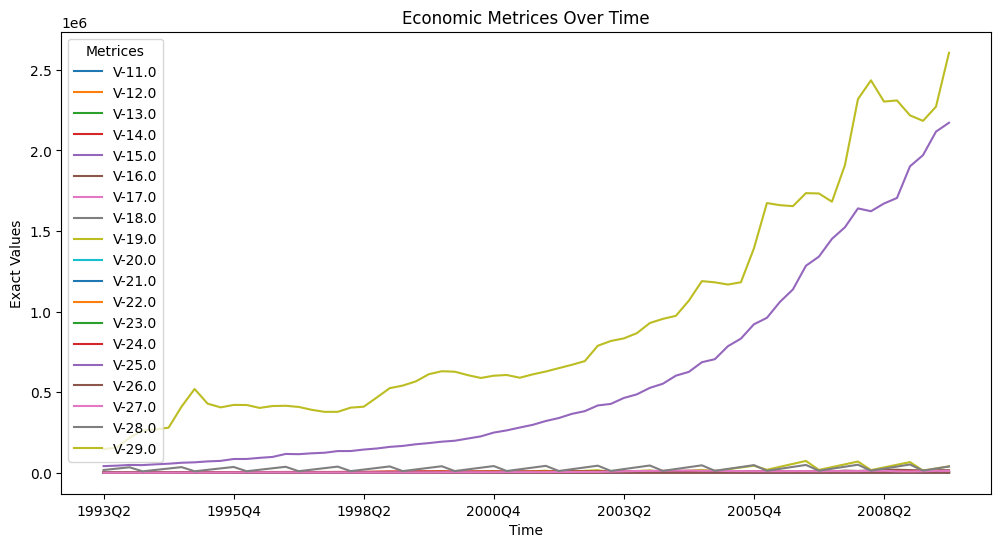

In [97]:
#Basic Plot
lag0_df_basic = lag0_df.set_index('START YEAR AND QUARTER')
lag0_df_basic.iloc[:,:].plot(figsize=(12, 6))
plt.title('Economic Metrices Over Time')
plt.xlabel('Time')
plt.ylabel('Exact Values')
plt.legend(title='Metrices')
plt.show()

**Findings: Scale stretch from 0 up to 2.5x10e6 (need to look at a different plot) to see pattern; V-29 and V-15 stand out, they are ... (to be completed)**

###Plot by quarter-over-quarter ratio [not useful]

In [98]:
#Plot comparing current quarter with last quarter
lag0_df_versusLast = lag0_df.iloc[:,1:] # copy without the first col
lag0_df_versusLast = lag0_df_versusLast.iloc[1:,].reset_index()/lag0_df_versusLast.iloc[:-1,].reset_index()
lag0_df_versusLast = lag0_df_versusLast.drop(columns=['index'])
lag0_df_versusLast = pd.concat([lag0_df.iloc[1:,0].reset_index(),lag0_df_versusLast],axis=1).drop(columns=['index'])
lag0_df_versusLast = lag0_df_versusLast.set_index('START YEAR AND QUARTER')
lag0_df_versusLast

,V-11.0,V-12.0,V-13.0,V-14.0,V-15.0,V-16.0,V-17.0,V-18.0,V-19.0,V-20.0,V-21.0,V-22.0,V-23.0,V-24.0,V-25.0,V-26.0,V-27.0,V-28.0,V-29.0
START YEAR AND QUARTER,,,,,,,,,,,,,,,,,,,
1993Q3,1.011570,1.031496,1.132353,0.740000,1.068800,0.908264,1.064649,1.500147,1.500000,1.00,0.884216,0.932589,1.041407,1.098688,1.058774,1.059558,0.976372,1.500000,1.056577
1993Q4,1.011437,1.038168,1.117647,1.252252,1.098035,1.258245,1.060724,1.333203,1.333333,1.00,1.219025,1.175875,1.055705,1.264355,1.091990,1.057117,1.138062,1.333333,1.398361
1994Q1,0.680504,1.051471,1.104580,0.964029,0.983584,0.833138,1.057247,0.393979,0.400470,1.25,0.889692,0.829679,1.000000,1.169964,1.087872,1.030017,1.013234,0.257372,1.208107
1994Q2,1.208471,1.083916,1.094678,1.246269,1.101464,1.173315,1.054147,1.999627,1.999960,1.00,1.097997,1.228882,1.000000,0.943505,1.058077,1.044130,1.101507,2.000000,1.025497
1994Q3,0.710970,1.083871,1.086490,0.904192,1.072704,1.184103,1.050820,1.500093,1.500010,1.00,1.098126,1.108295,1.000000,1.094501,1.087066,1.066188,1.249789,1.500000,1.039757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,0.730316,1.043656,0.962133,0.581040,1.020552,0.988090,0.973045,1.500030,1.500000,1.00,1.027415,0.997233,1.059951,1.064305,1.058569,1.080739,0.752954,1.500000,1.002975
2008Q4,1.010652,1.014464,0.942443,0.905263,1.115207,0.873876,0.944254,1.333307,1.333333,1.00,1.014966,1.040124,0.981684,0.977058,1.005932,1.035645,0.899458,1.333333,0.960005
2009Q1,0.822740,1.007707,0.915597,1.017442,1.036352,0.911519,1.066534,0.206884,0.200175,1.00,1.070472,1.102613,1.004998,1.004094,1.026770,1.013673,1.162167,0.253509,0.984545


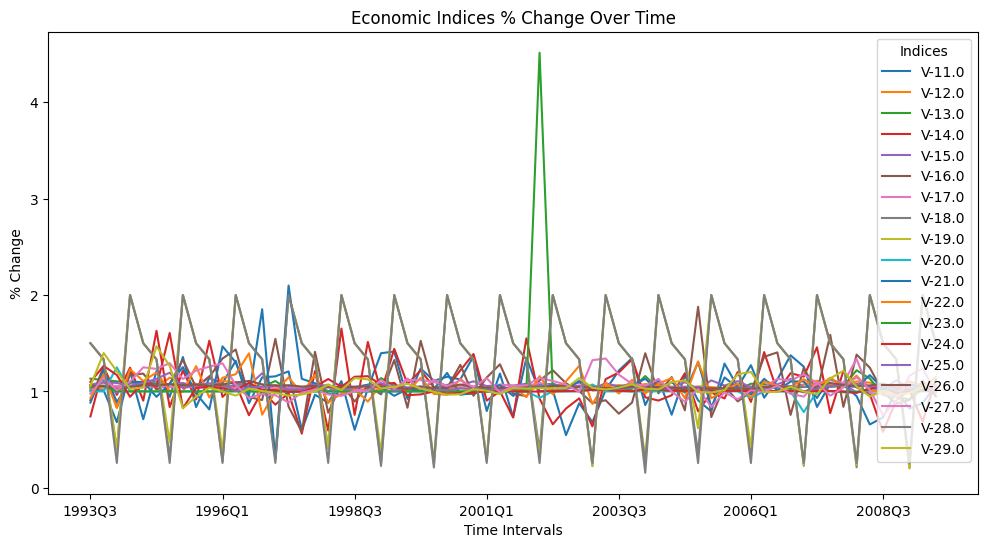

In [99]:
lag0_df_versusLast.plot(figsize=(12, 6))
plt.title('Economic Indices % Change Over Time')
plt.xlabel('Time Intervals')
plt.ylabel('% Change')
plt.legend(title='Indices')
plt.show()

**Findings: From V-19, we sees a repetitive pattern in a 4 quarter-cycle; From V-23, ... (to be completed)**

### Plot by quarter-over-quarter **log-ratio** [not useful]

In [100]:
lag0_df_vLastTakeLog = lag0_df_versusLast.applymap(lambda x: np.log(x))
lag0_df_vLastTakeLog

<ipython-input-100-87e278af15eb>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lag0_df_vLastTakeLog = lag0_df_versusLast.applymap(lambda x: np.log(x))


,V-11.0,V-12.0,V-13.0,V-14.0,V-15.0,V-16.0,V-17.0,V-18.0,V-19.0,V-20.0,V-21.0,V-22.0,V-23.0,V-24.0,V-25.0,V-26.0,V-27.0,V-28.0,V-29.0
START YEAR AND QUARTER,,,,,,,,,,,,,,,,,,,
1993Q3,0.011503,0.031010,0.124298,-0.301105,0.066537,-0.096220,0.062645,0.405563,0.405465,0.000000,-0.123054,-0.069791,0.040573,0.094117,0.057112,0.057852,-0.023912,0.405465,0.055035
1993Q4,0.011372,0.037458,0.111226,0.224944,0.093522,0.229718,0.058951,0.287584,0.287682,0.000000,0.198052,0.162012,0.054209,0.234562,0.088002,0.055545,0.129327,0.287682,0.335301
1994Q1,-0.384922,0.050190,0.099465,-0.036634,-0.016553,-0.182556,0.055669,-0.931457,-0.915118,0.223144,-0.116880,-0.186716,0.000000,0.156973,0.084224,0.029575,0.013147,-1.357233,0.189055
1994Q2,0.189356,0.080580,0.090460,0.220154,0.096640,0.159833,0.052732,0.692961,0.693127,0.000000,0.093487,0.206104,0.000000,-0.058154,0.056454,0.043184,0.096679,0.693147,0.025177
1994Q3,-0.341126,0.080539,0.082952,-0.100714,0.070182,0.168986,0.049570,0.405527,0.405472,0.000000,0.093605,0.102823,0.000000,0.090299,0.083483,0.064090,0.222975,0.405465,0.038987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,-0.314278,0.042730,-0.038602,-0.542936,0.020344,-0.011981,-0.027325,0.405485,0.405465,0.000000,0.027046,-0.002771,0.058222,0.062322,0.056918,0.077645,-0.283751,0.405465,0.002971
2008Q4,0.010596,0.014361,-0.059280,-0.099530,0.109040,-0.134817,-0.057360,0.287662,0.287682,0.000000,0.014855,0.039340,-0.018486,-0.023209,0.005914,0.035024,-0.105963,0.287682,-0.040817
2009Q1,-0.195115,0.007678,-0.088180,0.017291,0.035707,-0.092643,0.064414,-1.575596,-1.608563,0.000000,0.068100,0.097683,0.004985,0.004086,0.026418,0.013580,0.150286,-1.372356,-0.015575


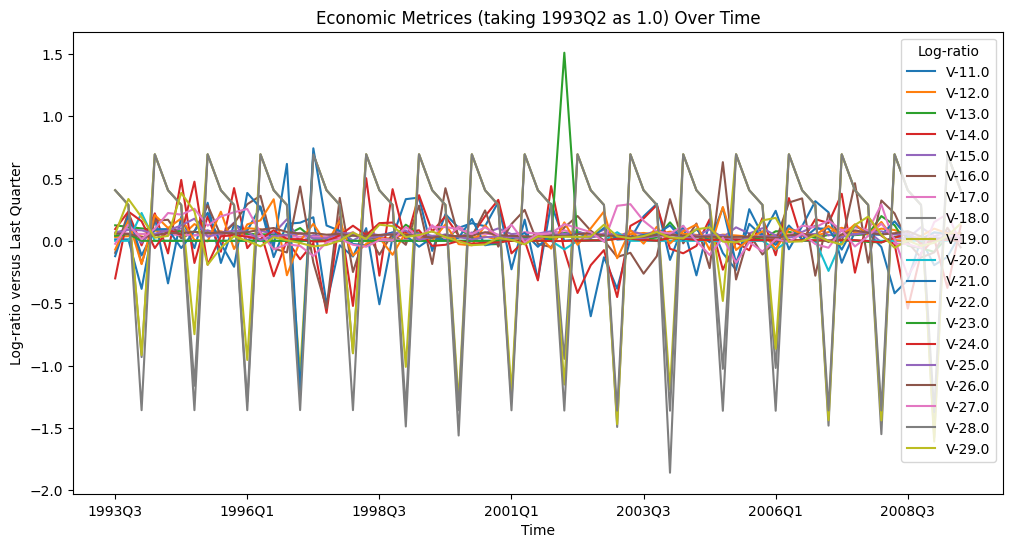

In [101]:
lag0_df_vLastTakeLog.iloc[:,:].plot(figsize=(12, 6))
plt.title('Economic Metrices (taking 1993Q2 as 1.0) Over Time')
plt.xlabel('Time')
plt.ylabel('Log-ratio versus Last Quarter')
plt.legend(title='Log-ratio')
plt.show()

**(No further findings)**

###Plot with reference to 1993Q2 (denoted as *Quarter0* )

In [102]:
#Plot comparing current quarter with "Quarter0" (1993Q2)
lag0_df_refQ0 = lag0_df.set_index('START YEAR AND QUARTER')
lag0_df_refQ0 = lag0_df_refQ0/lag0_df_refQ0.iloc[0,]
lag0_df_refQ0

,V-11.0,V-12.0,V-13.0,V-14.0,V-15.0,V-16.0,V-17.0,V-18.0,V-19.0,V-20.0,V-21.0,V-22.0,V-23.0,V-24.0,V-25.0,V-26.0,V-27.0,V-28.0,V-29.0
START YEAR AND QUARTER,,,,,,,,,,,,,,,,,,,
1993Q2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1993Q3,1.011570,1.031496,1.132353,0.740000,1.068800,0.908264,1.064649,1.500147,1.500000,1.000000,0.884216,0.932589,1.041407,1.098688,1.058774,1.059558,0.976372,1.500000,1.056577
1993Q4,1.023139,1.070866,1.265571,0.926667,1.173580,1.142819,1.129298,2.000000,2.000000,1.000000,1.077882,1.096608,1.099419,1.389132,1.156171,1.120077,1.111172,2.000000,1.477477
1994Q1,0.696250,1.125984,1.397924,0.893333,1.154314,0.952126,1.193948,0.787959,0.800939,1.250000,0.958982,0.909833,1.099419,1.625234,1.257767,1.153698,1.125878,0.514744,1.784950
1994Q2,0.841398,1.220472,1.530277,1.113333,1.271436,1.117144,1.258597,1.575624,1.601846,1.250000,1.052960,1.118076,1.099419,1.533417,1.330814,1.204611,1.240162,1.029488,1.830461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,1.186460,20.141732,18.726644,2.533333,41.568260,49.393688,20.110041,7.359178,160.019851,0.916667,17.901350,15.784027,6.261869,6.308120,15.994962,19.673391,24.390714,2.263936,15.728661
2008Q4,1.199098,20.433071,17.648789,2.293333,46.357233,43.163948,18.988996,9.812041,213.359780,0.916667,18.169263,16.417347,6.147178,6.163398,16.089840,20.374640,21.938424,3.018582,15.099591
2009Q1,0.986546,20.590551,16.159170,2.333333,48.042426,39.344745,20.252407,2.029956,42.709326,0.916667,19.449688,18.101975,6.177899,6.188632,16.520571,20.653218,25.496103,0.765238,14.866234


In [103]:
lag0_df_refQ0.to_pickle(path + 'lag0_df_refQ0.pkl')
lag0_df_refQ0.to_csv(path + 'lag0_df_refQ0.csv')

In [104]:
'''
V-19 (col8) variates upto 2X000%

V-15,16,27 (i.e. col4,5,16) variates upto 5000%

V-12 (col1), V-13 (col2), V-17 (col6),
V-21 (col10), V-22 (col-11), V-25 (col14), V-26 (col15), V-29 (col18) are variating up to 5000%

others variate within 1000%
'''

'\nV-19 (col8) variates upto 2X000%\n\nV-15,16,27 (i.e. col4,5,16) variates upto 5000%\n\nV-12 (col1), V-13 (col2), V-17 (col6),\nV-21 (col10), V-22 (col-11), V-25 (col14), V-26 (col15), V-29 (col18) are variating up to 5000%\n\nothers variate within 1000%\n'

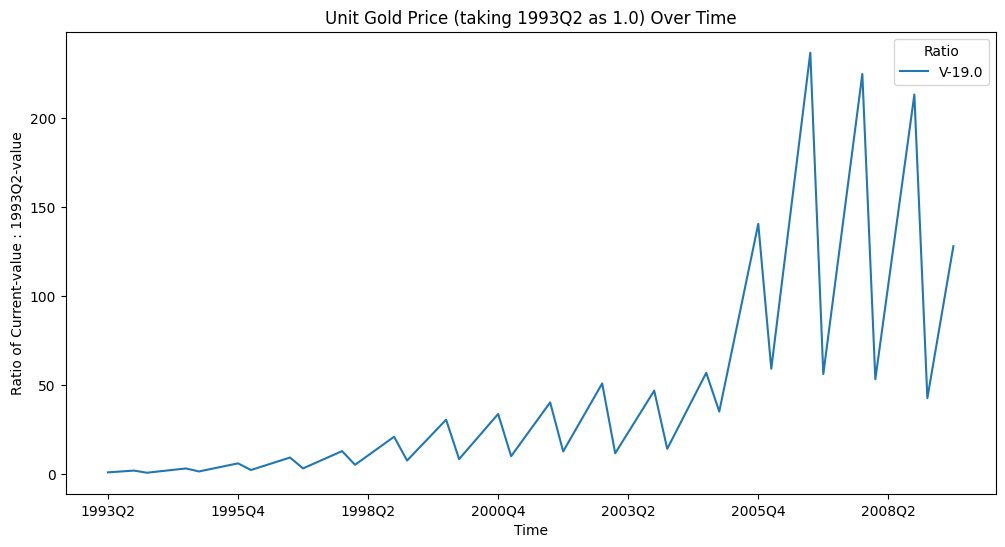

In [105]:
lag0_df_refQ0.loc[:,'V-19.0'].plot(figsize=(12, 6))
#V-19: Amount of loans extended by banks in a quarter (in $10m)
plt.title('Unit Gold Price (taking 1993Q2 as 1.0) Over Time')
plt.xlabel('Time')
plt.ylabel('Ratio of Current-value : 1993Q2-value')
plt.legend(title='Ratio')
plt.show()

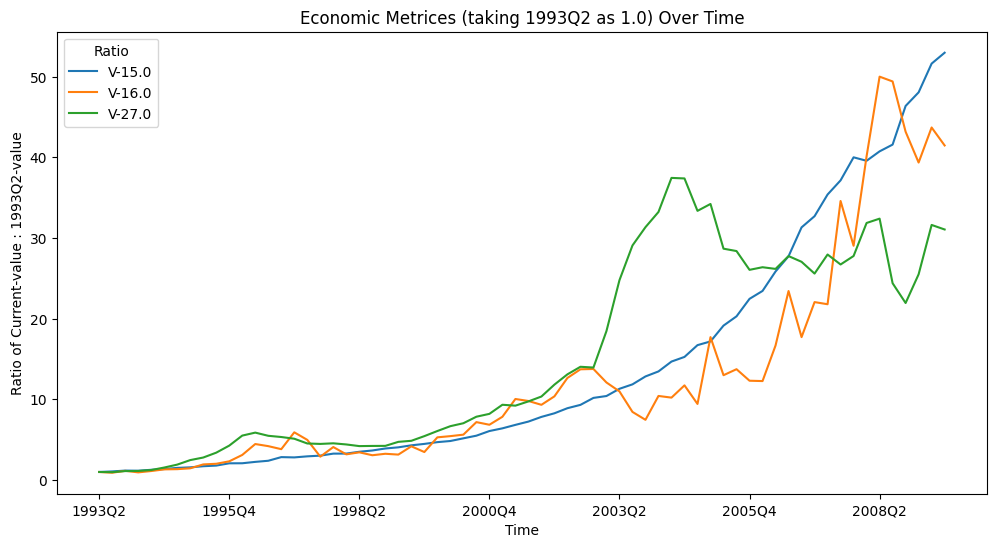

In [106]:
lag0_df_refQ0.loc[:,['V-15.0','V-16.0','V-27.0']].plot(figsize=(12, 6))
#V-15: Cumulative Liquidity (in $10m)
#V-16: Private Sector investment in new buildings (in $10m)
#V-27: Stock market index
plt.title('Economic Metrices (taking 1993Q2 as 1.0) Over Time')
plt.xlabel('Time')
plt.ylabel('Ratio of Current-value : 1993Q2-value')
plt.legend(title='Ratio')
plt.show()

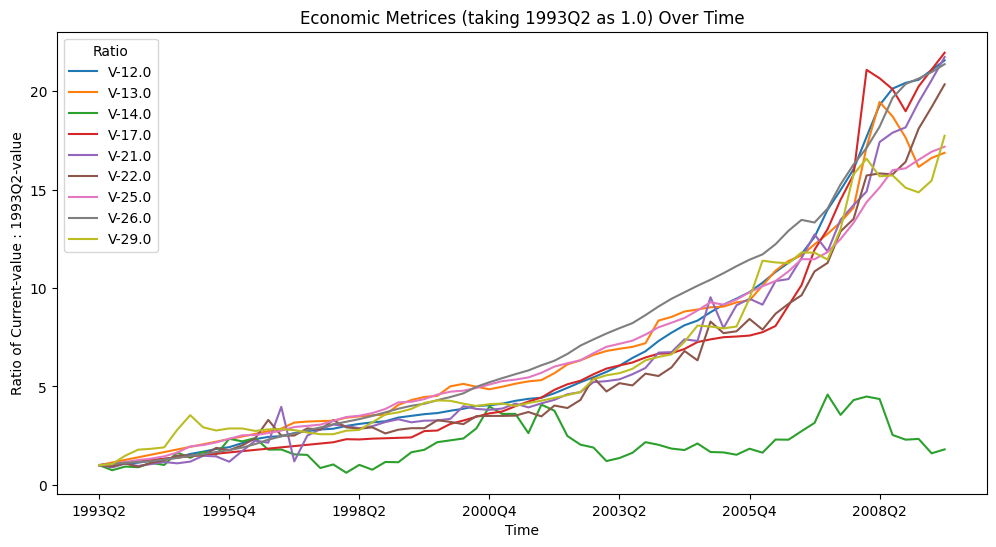

In [107]:
lag0_df_refQ0.loc[:,['V-12.0','V-13.0','V-14.0','V-17.0','V-21.0','V-22.0','V-25.0','V-26.0','V-29.0']].plot(figsize=(12, 6))
#mid variation metrices only
#V-12: Building Service Index (base year: 2004) ** See "Note: For "Index"-type of econ data, base-year changing is JUST a change of scale"
#V-13: Wholesales Price Index (base year: 2004)
#V-14: Total floor areas permitted by city municipality (in sq. metre)
#V-17: Land Price Index (base year: 2004)
#V-21: Average construction cost of buildings by private sector at the time of completion of construction
#V-22: Average construction cost of buildings by private sector at the beginning of the construction
#V-25: Consumer price index (CPI) (base year: 2004)
#V-26: CPI of housing, water, fuel & power (base year: 2004)
#V-29: Unit Gold Price (in $)
plt.title('Economic Metrices (taking 1993Q2 as 1.0) Over Time')
plt.xlabel('Time')
plt.ylabel('Ratio of Current-value : 1993Q2-value')
plt.legend(title='Ratio')
plt.show()

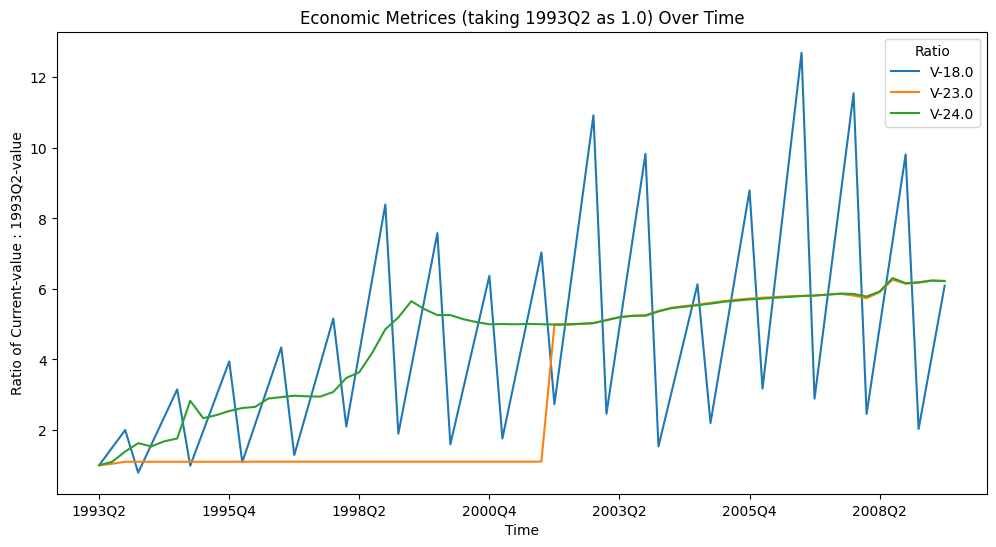

In [108]:
lag0_df_refQ0.loc[:,['V-18.0','V-23.0','V-24.0']].plot(figsize=(12, 6)) #relatively low movement metrices
#V-18: Number of loans extended by banks in a quarter (in integer)
#V-23: Official Exchange Rate (in ?IRR = 1 USD)
#V-24: Nonofficial (street market) exchange rate (in ?IRR = 1 USD)
plt.title('Economic Metrices (taking 1993Q2 as 1.0) Over Time')
plt.xlabel('Time')
plt.ylabel('Ratio of Current-value : 1993Q2-value')
plt.legend(title='Ratio')
plt.show()

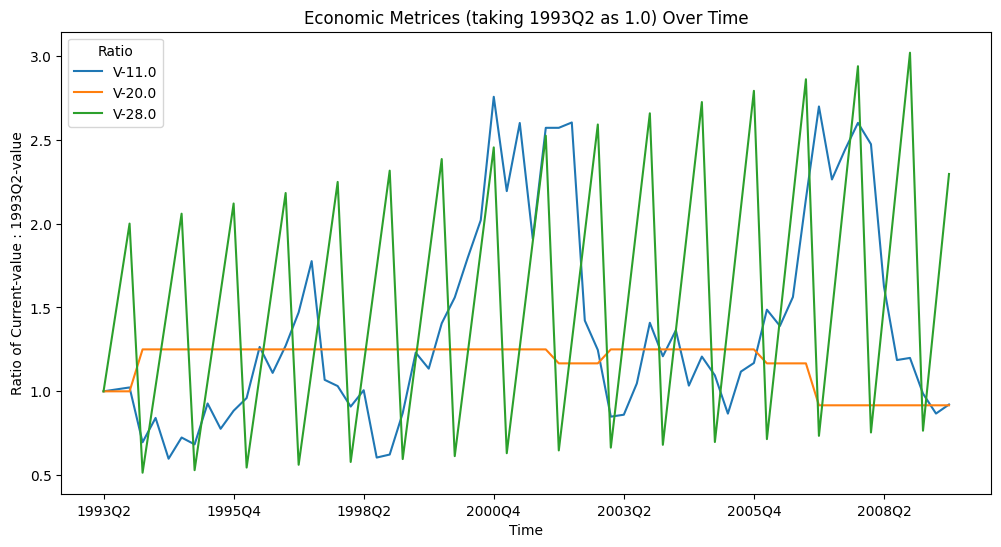

In [109]:
lag0_df_refQ0.loc[:,['V-11.0','V-20.0','V-28.0']].plot(figsize=(12, 6)) #low movement metrices
plt.title('Economic Metrices (taking 1993Q2 as 1.0) Over Time')
#V-11: Number of building permits issued
#V-20: Interest rate (in %)
#V-28: Population of Tehran
plt.xlabel('Time')
plt.ylabel('Ratio of Current-value : 1993Q2-value')
plt.legend(title='Ratio')
plt.show()

**Findings:**

#### **Note: For "Index"-type of econ data, base-year changing is JUST a change of scale

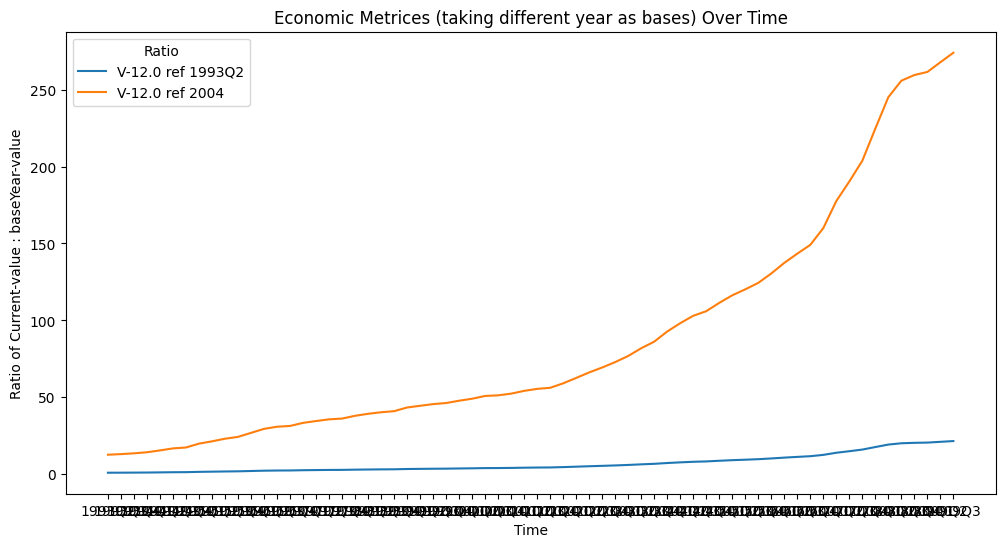

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(lag0_df_refQ0.loc[:,['V-12.0']].index,lag0_df_refQ0.loc[:,['V-12.0']], label="V-12.0 ref 1993Q2")
plt.plot(lag0_df_basic.loc[:,['V-12.0']].index,lag0_df_basic.loc[:,['V-12.0']], label="V-12.0 ref 2004")

plt.title('Economic Metrices (taking different year as bases) Over Time')
plt.xlabel('Time')
plt.ylabel('Ratio of Current-value : baseYear-value')
plt.legend(title='Ratio')
plt.show()

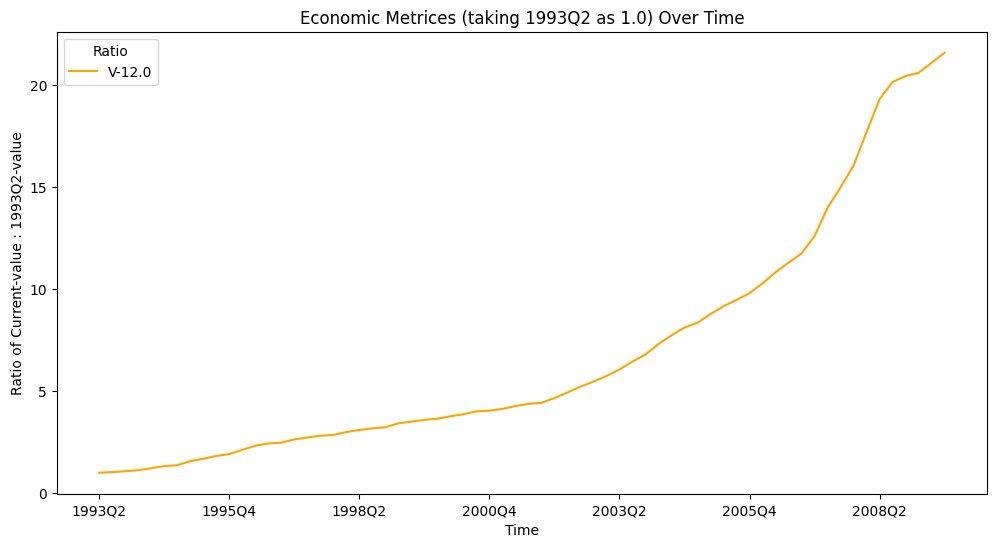

In [111]:
lag0_df_refQ0.loc[:,['V-12.0']].plot(figsize=(12, 6),color='orange')
plt.title('Economic Metrices (taking 1993Q2 as 1.0) Over Time')
plt.xlabel('Time')
plt.ylabel('Ratio of Current-value : 1993Q2-value')
plt.legend(title='Ratio')
plt.show()

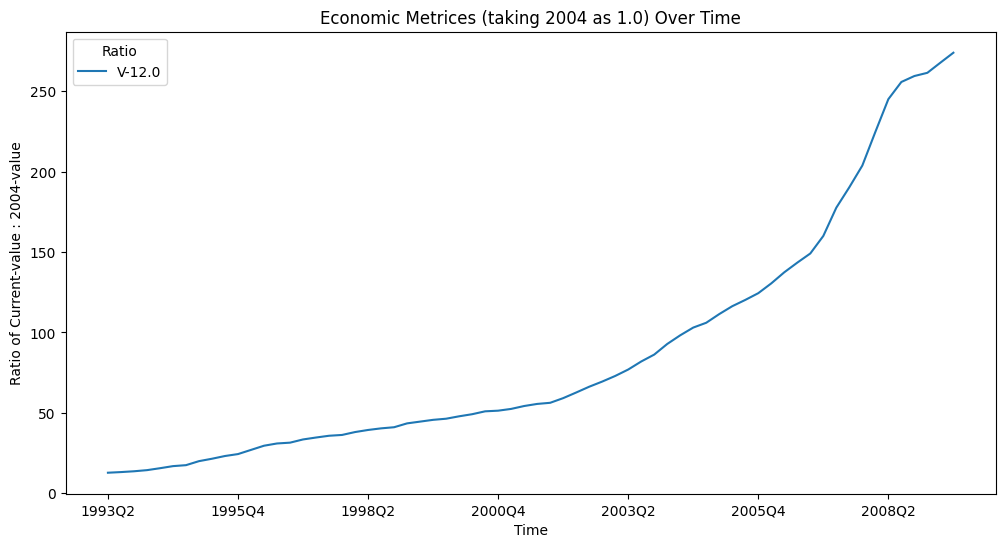

In [112]:
lag0_df_basic.loc[:,['V-12.0']].plot(figsize=(12, 6))
plt.title('Economic Metrices (taking 2004 as 1.0) Over Time')
plt.xlabel('Time')
plt.ylabel('Ratio of Current-value : 2004-value')
plt.legend(title='Ratio')
plt.show()

### Prepare an all-in-one dataframe for later use

In [113]:
df_lag012345 = pd.merge(df,lag0_df, how='left')
df_lag012345

,Actual Sales Price,Actual Construction Cost,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-20.0,V-21.0,V-22.0,V-23.0,V-24.0,V-25.0,V-26.0,V-27.0,V-28.0,V-29.0
0,2200,410,2002,1,2006,1,1,3150.0,920.0,598.5,...,14.0,831.8,938.4,7924.48,7994.0,71.56,65.65,4294.06,10927.50,648845.6
1,5000,1000,2005,1,2010,4,1,7600.0,1140.0,3040.0,...,15.0,1836.6,1932.5,8920.04,8938.0,110.51,108.51,12423.86,11774.00,1181572.6
2,1200,170,1999,1,2002,4,1,4800.0,840.0,480.0,...,15.0,641.5,652.2,1755.00,8315.0,49.92,40.26,1718.90,10058.50,540680.6
3,165,30,1993,2,1994,2,1,685.0,202.0,13.7,...,12.0,192.6,232.9,1591.75,1601.0,11.91,10.41,363.13,16871.50,146872.1
4,5500,700,2008,1,2011,2,1,3000.0,800.0,1230.0,...,11.0,2871.3,3662.6,9132.66,9260.0,171.13,178.30,11568.00,12732.00,2435004.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1100,150,2004,4,2007,1,20,1350.0,350.0,108.0,...,15.0,1408.4,1473.5,8842.18,8864.0,105.52,105.32,12113.01,45966.00,1188995.8
368,740,80,2002,2,2003,4,20,600.0,150.0,36.0,...,14.0,886.4,909.2,7930.66,8004.0,73.57,69.26,4756.68,21855.00,669640.3
369,860,220,2005,4,2007,3,20,1900.0,430.0,285.0,...,15.0,1821.6,1963.7,9114.22,9131.0,116.56,119.13,9459.40,47096.00,1391757.1
370,1100,110,2003,3,2005,4,20,510.0,160.0,30.6,...,15.0,1082.5,1176.5,8343.60,8382.0,87.27,85.56,10555.47,33626.25,865878.9


**Reviewing the most recent starting year data (2009)**

In [114]:
df_lag012345[ df_lag012345['START YEAR AD'] == 2009 ]

,Actual Sales Price,Actual Construction Cost,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-20.0,V-21.0,V-22.0,V-23.0,V-24.0,V-25.0,V-26.0,V-27.0,V-28.0,V-29.0
7,4600,600,2009,1,2010,3,1,1150.0,380.0,575.0,...,11.0,3746.01,4215.95,9833.67,9908.0,196.76,215.0,9258.4,12910.71,2183435.0
61,3750,650,2009,1,2010,3,3,1500.0,350.0,810.0,...,11.0,3746.01,4215.95,9833.67,9908.0,196.76,215.0,9258.4,12910.71,2183435.0
62,4000,700,2009,2,2011,1,3,3100.0,640.0,1798.0,...,11.0,3962.24,4472.30,9925.49,9988.0,201.66,218.4,11479.8,25821.42,2271543.7
86,1700,650,2009,1,2010,4,4,1800.0,500.0,954.0,...,11.0,3746.01,4215.95,9833.67,9908.0,196.76,215.0,9258.4,12910.71,2183435.0
97,1900,390,2009,4,2010,4,4,1450.0,336.0,536.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2000,450,2009,3,2011,1,20,1560.0,520.0,624.0,...,11.0,4188.65,4741.56,9916.90,9963.0,204.70,222.6,11274.9,38732.14,2606321.0


**Finding & Precaution: Data in the latest starting month (2009Q4) with have missing values**

## Output new dataframe: Original DF with Lag-0 data only

**df_onLag0**

In [115]:
#check all column headers
pd.set_option('display.max_columns', 70) #expand limit on display lengthy table
print(df_lag012345.iloc[0:0,:70])
print(df_lag012345.iloc[0:0,70:])
pd.set_option('display.max_columns', 20) #set it back to default (20)

Empty DataFrame
Columns: [Actual Sales Price, Actual Construction Cost, START YEAR AD, START QUARTER, COMPLETION YEAR AD, COMPLETION QUARTER, V-1, V-2, V-3, V-4, V-5, V-6, V-7, V-8, V-11, V-12, V-13, V-14, V-15, V-16, V-17, V-18, V-19, V-20, V-21, V-22, V-23, V-24, V-25, V-26, V-27, V-28, V-29, V-11.1, V-12.1, V-13.1, V-14.1, V-15.1, V-16.1, V-17.1, V-18.1, V-19.1, V-20.1, V-21.1, V-22.1, V-23.1, V-24.1, V-25.1, V-26.1, V-27.1, V-28.1, V-29.1, V-11.2, V-12.2, V-13.2, V-14.2, V-15.2, V-16.2, V-17.2, V-18.2, V-19.2, V-20.2, V-21.2, V-22.2, V-23.2, V-24.2, V-25.2, V-26.2, V-27.2, V-28.2]
Index: []
Empty DataFrame
Columns: [V-29.2, V-11.3, V-12.3, V-13.3, V-14.3, V-15.3, V-16.3, V-17.3, V-18.3, V-19.3, V-20.3, V-21.3, V-22.3, V-23.3, V-24.3, V-25.3, V-26.3, V-27.3, V-28.3, V-29.3, V-11.4, V-12.4, V-13.4, V-14.4, V-15.4, V-16.4, V-17.4, V-18.4, V-19.4, V-20.4, V-21.4, V-22.4, V-23.4, V-24.4, V-25.4, V-26.4, V-27.4, V-28.4, V-29.4, START YEAR AND QUARTER, V-11.0, V-12.0, V-13.0, V-14.0, V-15

In [116]:
df_onLag0 = pd.concat([df_lag012345.loc[:,'Actual Sales Price':'V-8'],df_lag012345.loc[:,'START YEAR AND QUARTER':'V-29.0']],axis=1)
df_onLag0

,Actual Sales Price,Actual Construction Cost,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-20.0,V-21.0,V-22.0,V-23.0,V-24.0,V-25.0,V-26.0,V-27.0,V-28.0,V-29.0
0,2200,410,2002,1,2006,1,1,3150.0,920.0,598.5,...,14.0,831.8,938.4,7924.48,7994.0,71.56,65.65,4294.06,10927.50,648845.6
1,5000,1000,2005,1,2010,4,1,7600.0,1140.0,3040.0,...,15.0,1836.6,1932.5,8920.04,8938.0,110.51,108.51,12423.86,11774.00,1181572.6
2,1200,170,1999,1,2002,4,1,4800.0,840.0,480.0,...,15.0,641.5,652.2,1755.00,8315.0,49.92,40.26,1718.90,10058.50,540680.6
3,165,30,1993,2,1994,2,1,685.0,202.0,13.7,...,12.0,192.6,232.9,1591.75,1601.0,11.91,10.41,363.13,16871.50,146872.1
4,5500,700,2008,1,2011,2,1,3000.0,800.0,1230.0,...,11.0,2871.3,3662.6,9132.66,9260.0,171.13,178.30,11568.00,12732.00,2435004.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1100,150,2004,4,2007,1,20,1350.0,350.0,108.0,...,15.0,1408.4,1473.5,8842.18,8864.0,105.52,105.32,12113.01,45966.00,1188995.8
368,740,80,2002,2,2003,4,20,600.0,150.0,36.0,...,14.0,886.4,909.2,7930.66,8004.0,73.57,69.26,4756.68,21855.00,669640.3
369,860,220,2005,4,2007,3,20,1900.0,430.0,285.0,...,15.0,1821.6,1963.7,9114.22,9131.0,116.56,119.13,9459.40,47096.00,1391757.1
370,1100,110,2003,3,2005,4,20,510.0,160.0,30.6,...,15.0,1082.5,1176.5,8343.60,8382.0,87.27,85.56,10555.47,33626.25,865878.9


In [117]:
df_onLag0.to_pickle(path+'df_onLag0.pkl')
df_onLag0.to_csv(path+'df_onLag0.csv')

## Output new dataframe: Original DF with Moving-Average on FOUR Lag-1,2,3,4 data

**df_mAvgFour**

In [118]:
#check column indeces to be extract for averaging
print(df.iloc[0:0,[14,32]]) #lag1 data running from col14 to col32 (inclusive)
print(df.iloc[0:0,[33,51]]) #lag2 data: col33 to col51 (inclusive)
print(df.iloc[0:0,[52,70]]) #lag3 data: col52 to col70 (inclusive)
print(df.iloc[0:0,[71,89]]) #lag4 data: col71 to col89 (inclusive)

Empty DataFrame
Columns: [V-11, V-29]
Index: []
Empty DataFrame
Columns: [V-11.1, V-29.1]
Index: []
Empty DataFrame
Columns: [V-11.2, V-29.2]
Index: []
Empty DataFrame
Columns: [V-11.3, V-29.3]
Index: []


In [119]:
def gen_new_df(df, first_col_lag1=14, last_col_lag1=32, lags_taken=4):
  '''
  From a full dataframes carrying multiple lag data,
  generate a new dataframe of moving-average of multiple lag-data

  Input
  =====
  df (dataframe): Full dataframes with multiple lags
  first_col_lag1 (int): First column in the first lag
  last_col_lag1 (int): Last column in the first lag
  lags_taken (int): How many lags to be taken

  Output
  ======
  new_df (dataframe): A dataframe summarise multiple lags in fewer columns
  '''

  import numpy as np

  mAvg_df = pd.DataFrame()
  lg = str(lags_taken)
  cols_per_lag = last_col_lag1 - first_col_lag1 + 1

  for col_index in np.arange(first_col_lag1, last_col_lag1 + 1): #e.g. for np.arange is an array([14,15,16, ..., 32])
    for x in np.arange(lags_taken):
      if x == 0:
        mAvg_df[df.columns[col_index]+'.mA'+lg+'l'] = df.iloc[:,col_index]
      else:
        mAvg_df[df.columns[col_index]+'.mA'+lg+'l'] = mAvg_df[df.columns[col_index]+'.mA'+lg+'l'] + df.iloc[:,col_index + x*cols_per_lag]
  mAvg_df = mAvg_df/lags_taken

  result_df = pd.concat([df.iloc[:,:first_col_lag1], mAvg_df], axis=1)

  return result_df

In [120]:
df_mAvgFour = gen_new_df(df,14,32,4)
df_mAvgFour

,Actual Sales Price,Actual Construction Cost,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-20.mA4l,V-21.mA4l,V-22.mA4l,V-23.mA4l,V-24.mA4l,V-25.mA4l,V-26.mA4l,V-27.mA4l,V-28.mA4l,V-29.mA4l
0,2200,410,2002,1,2006,1,1,3150.0,920.0,598.5,...,15.00,774.225000,826.4000,1755.000,8008.75,64.8200,59.6950,3508.2300,26616.8750,608637.350
1,5000,1000,2005,1,2010,4,1,7600.0,1140.0,3040.0,...,15.00,1356.375000,1433.8500,8718.540,8745.75,99.9975,100.0000,12836.1700,28728.7500,1046230.025
2,1200,170,1999,1,2002,4,1,4800.0,840.0,480.0,...,15.00,579.102124,658.2400,1755.000,6469.75,43.0325,35.7300,1550.6150,24416.2500,451132.475
3,165,30,1993,2,1994,2,1,685.0,202.0,13.7,...,12.00,174.242877,196.9375,1501.695,1547.00,10.6400,9.5125,481.8350,20545.4375,129030.050
4,5500,700,2008,1,2011,2,1,3000.0,800.0,1230.0,...,11.00,2517.400000,2825.4750,9282.345,9357.25,146.2125,153.3750,9805.5000,30982.5000,1910539.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1100,150,2004,4,2007,1,20,1350.0,350.0,108.0,...,15.00,1290.225000,1394.5500,8599.190,8628.00,96.3550,96.1175,12652.7600,28446.0000,981237.850
368,740,80,2002,2,2003,4,20,600.0,150.0,36.0,...,14.75,795.475000,857.1250,3297.370,8004.00,67.0150,61.9950,3734.8150,26687.0625,619217.700
369,860,220,2005,4,2007,3,20,1900.0,430.0,285.0,...,15.00,1634.325000,1754.7250,8956.685,8975.50,109.3000,110.3825,11313.1300,29152.5000,1180030.500
370,1100,110,2003,3,2005,4,20,510.0,160.0,30.6,...,14.50,989.875000,1145.7750,8099.720,8147.25,80.9975,78.3800,6463.9475,27529.6875,782909.950


In [121]:
#df_mAvgFour.to_csv(path + 'df_mAvgFour_for_gen_new_df.csv') #offline check

In [122]:
df_mAvgFour.to_pickle(path+'df_mAvgFour.pkl')
df_mAvgFour.to_csv(path+'df_mAvgFour.csv')

## Output new dataframe: Original DF with Moving-Average on FIVE Lag-1,2,3,4,5

In [123]:
df_mAvgFive = gen_new_df(df,14,32,5)
df_mAvgFive

,Actual Sales Price,Actual Construction Cost,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-20.mA5l,V-21.mA5l,V-22.mA5l,V-23.mA5l,V-24.mA5l,V-25.mA5l,V-26.mA5l,V-27.mA5l,V-28.mA5l,V-29.mA5l
0,2200,410,2002,1,2006,1,1,3150.0,920.0,598.5,...,15.0,766.140000,824.220,1755.000,8007.4,64.004,58.608,3402.236,29574.90,607307.50
1,5000,1000,2005,1,2010,4,1,7600.0,1140.0,3040.0,...,15.0,1313.860000,1410.340,8647.788,8675.2,98.188,97.958,12544.810,31950.00,1022789.44
2,1200,170,1999,1,2002,4,1,4800.0,840.0,480.0,...,15.0,581.181700,679.752,1755.000,6161.8,42.166,34.992,1571.104,27119.60,436471.70
3,165,30,1993,2,1994,2,1,685.0,202.0,13.7,...,12.0,178.930213,188.000,1489.818,1528.8,10.458,9.278,522.700,18075.15,127630.38
4,5500,700,2008,1,2011,2,1,3000.0,800.0,1230.0,...,11.6,2458.040000,2709.200,9272.228,9343.0,144.290,150.740,9808.600,34438.00,1875426.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1100,150,2004,4,2007,1,20,1350.0,350.0,108.0,...,15.0,1248.680000,1350.940,8548.072,8578.8,94.538,94.006,12233.302,29482.05,958166.06
368,740,80,2002,2,2003,4,20,600.0,150.0,36.0,...,14.8,785.740000,848.800,2988.896,8005.8,66.168,60.886,3665.396,23479.00,616679.00
369,860,220,2005,4,2007,3,20,1900.0,430.0,285.0,...,15.0,1592.280000,1720.640,8920.690,8940.2,107.640,108.684,11764.864,30216.90,1157578.80
370,1100,110,2003,3,2005,4,20,510.0,160.0,30.6,...,14.4,969.180000,1098.460,8065.908,8118.6,79.512,76.556,6122.494,26394.75,760256.02


In [124]:
df_mAvgFive.to_pickle(path+'df_mAvgFive.pkl')
df_mAvgFive.to_csv(path+'df_mAvgFive.csv')

## Output Dataframe: Moving-Average on FOUR Lag-1,2,3,4 data ***interact with*** V-2 and V-3 separately

In [125]:
df_mAvgFourNew = df_mAvgFour.copy()

for i in np.arange(11,30):
  df_mAvgFourNew['V-2_V-'+str(i)+'.mA4l']=df_mAvgFour['V-2']*df_mAvgFourNew['V-'+str(i)+'.mA4l']
for i in np.arange(11,30):
  df_mAvgFourNew['V-3_V-'+str(i)+'.mA4l']=df_mAvgFour['V-3']*df_mAvgFourNew['V-'+str(i)+'.mA4l']

for i in np.arange(11,30):
  df_mAvgFourNew.drop(columns=['V-'+str(i)+'.mA4l'])

df_mAvgFourNew


,Actual Sales Price,Actual Construction Cost,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-3_V-20.mA4l,V-3_V-21.mA4l,V-3_V-22.mA4l,V-3_V-23.mA4l,V-3_V-24.mA4l,V-3_V-25.mA4l,V-3_V-26.mA4l,V-3_V-27.mA4l,V-3_V-28.mA4l,V-3_V-29.mA4l
0,2200,410,2002,1,2006,1,1,3150.0,920.0,598.5,...,13800.0,7.122870e+05,760288.000,1614600.00,7368050.0,59634.40,54919.400,3.227572e+06,2.448752e+07,5.599464e+08
1,5000,1000,2005,1,2010,4,1,7600.0,1140.0,3040.0,...,17100.0,1.546268e+06,1634589.000,9939135.60,9970155.0,113997.15,114000.000,1.463323e+07,3.275078e+07,1.192702e+09
2,1200,170,1999,1,2002,4,1,4800.0,840.0,480.0,...,12600.0,4.864458e+05,552921.600,1474200.00,5434590.0,36147.30,30013.200,1.302517e+06,2.050965e+07,3.789513e+08
3,165,30,1993,2,1994,2,1,685.0,202.0,13.7,...,2424.0,3.519706e+04,39781.375,303342.39,312494.0,2149.28,1921.525,9.733067e+04,4.150178e+06,2.606407e+07
4,5500,700,2008,1,2011,2,1,3000.0,800.0,1230.0,...,8800.0,2.013920e+06,2260380.000,7425876.00,7485800.0,116970.00,122700.000,7.844400e+06,2.478600e+07,1.528432e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1100,150,2004,4,2007,1,20,1350.0,350.0,108.0,...,5250.0,4.515787e+05,488092.500,3009716.50,3019800.0,33724.25,33641.125,4.428466e+06,9.956100e+06,3.434332e+08
368,740,80,2002,2,2003,4,20,600.0,150.0,36.0,...,2212.5,1.193212e+05,128568.750,494605.50,1200600.0,10052.25,9299.250,5.602222e+05,4.003059e+06,9.288266e+07
369,860,220,2005,4,2007,3,20,1900.0,430.0,285.0,...,6450.0,7.027597e+05,754531.750,3851374.55,3859465.0,46999.00,47464.475,4.864646e+06,1.253558e+07,5.074131e+08
370,1100,110,2003,3,2005,4,20,510.0,160.0,30.6,...,2320.0,1.583800e+05,183324.000,1295955.20,1303560.0,12959.60,12540.800,1.034232e+06,4.404750e+06,1.252656e+08


In [126]:
for i in np.arange(11,30):
  df_mAvgFourNew['V-2_V-'+str(i)+'.mA4l']=df_mAvgFour['V-2']*df_mAvgFourNew['V-'+str(i)+'.mA4l']
for i in np.arange(11,30):
  df_mAvgFourNew['V-3_V-'+str(i)+'.mA4l']=df_mAvgFour['V-3']*df_mAvgFourNew['V-'+str(i)+'.mA4l']

for i in np.arange(11,30):
  df_mAvgFourNew = df_mAvgFourNew.drop(columns=['V-'+str(i)+'.mA4l'])

df_mAvgFourNew

,Actual Sales Price,Actual Construction Cost,START YEAR AD,START QUARTER,COMPLETION YEAR AD,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-3_V-20.mA4l,V-3_V-21.mA4l,V-3_V-22.mA4l,V-3_V-23.mA4l,V-3_V-24.mA4l,V-3_V-25.mA4l,V-3_V-26.mA4l,V-3_V-27.mA4l,V-3_V-28.mA4l,V-3_V-29.mA4l
0,2200,410,2002,1,2006,1,1,3150.0,920.0,598.5,...,13800.0,7.122870e+05,760288.000,1614600.00,7368050.0,59634.40,54919.400,3.227572e+06,2.448752e+07,5.599464e+08
1,5000,1000,2005,1,2010,4,1,7600.0,1140.0,3040.0,...,17100.0,1.546268e+06,1634589.000,9939135.60,9970155.0,113997.15,114000.000,1.463323e+07,3.275078e+07,1.192702e+09
2,1200,170,1999,1,2002,4,1,4800.0,840.0,480.0,...,12600.0,4.864458e+05,552921.600,1474200.00,5434590.0,36147.30,30013.200,1.302517e+06,2.050965e+07,3.789513e+08
3,165,30,1993,2,1994,2,1,685.0,202.0,13.7,...,2424.0,3.519706e+04,39781.375,303342.39,312494.0,2149.28,1921.525,9.733067e+04,4.150178e+06,2.606407e+07
4,5500,700,2008,1,2011,2,1,3000.0,800.0,1230.0,...,8800.0,2.013920e+06,2260380.000,7425876.00,7485800.0,116970.00,122700.000,7.844400e+06,2.478600e+07,1.528432e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1100,150,2004,4,2007,1,20,1350.0,350.0,108.0,...,5250.0,4.515787e+05,488092.500,3009716.50,3019800.0,33724.25,33641.125,4.428466e+06,9.956100e+06,3.434332e+08
368,740,80,2002,2,2003,4,20,600.0,150.0,36.0,...,2212.5,1.193212e+05,128568.750,494605.50,1200600.0,10052.25,9299.250,5.602222e+05,4.003059e+06,9.288266e+07
369,860,220,2005,4,2007,3,20,1900.0,430.0,285.0,...,6450.0,7.027597e+05,754531.750,3851374.55,3859465.0,46999.00,47464.475,4.864646e+06,1.253558e+07,5.074131e+08
370,1100,110,2003,3,2005,4,20,510.0,160.0,30.6,...,2320.0,1.583800e+05,183324.000,1295955.20,1303560.0,12959.60,12540.800,1.034232e+06,4.404750e+06,1.252656e+08


In [127]:
df_mAvgFour.to_pickle(path+'df_mAvgFourNew.pkl')
df_mAvgFour.to_csv(path+'df_mAvgFourNew.csv')